In [3]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [5]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [43]:
titanic_data = pd.read_csv("C:/Users/User/Desktop/ML stepik задачи/stepik_data_ml/train.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


проверить пропущенные значения в столбцах

In [44]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

из-за того, что в Cabin очень много пропущенных значений
было принято решение не использовать этот столбец при обучении модели

Сейчас будет использована сокращенная версия массива,
Survived исключили так как мы хотим ее предсказать


In [45]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)
X.head()
y = titanic_data.Survived

In [46]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:

# could not convert string to float: 'male'

In [48]:
X = pd.get_dummies(X)
# определяет какие переменные нужно конвертировать

In [49]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [50]:
clf.fit(X,y)
# Input contains NaN, infinity or a value too large for dtype('float32')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [51]:
X = X.fillna({'Age' : X.Age.median()})
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [52]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [53]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


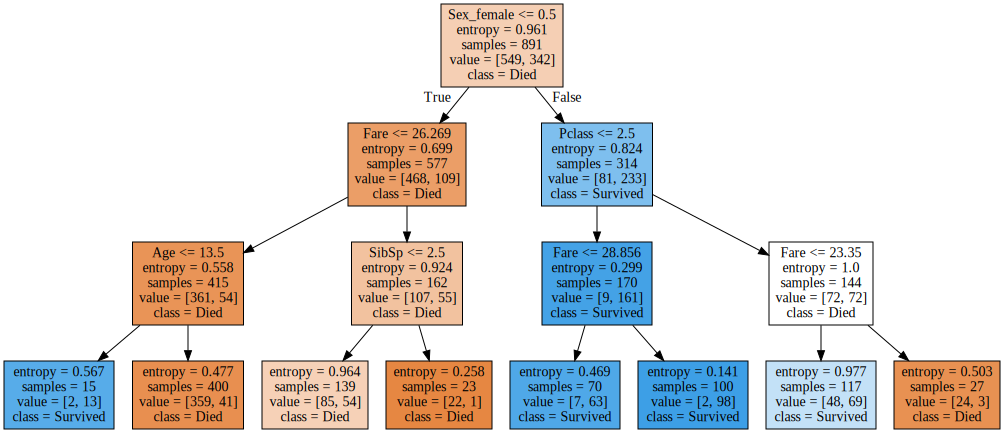

In [54]:
graph = Source(tree.export_graphviz(clf, out_file=None
                                    , feature_names=list(X), class_names=['Died','Survived']
                                   , filled=True))
display(SVG(graph.pipe(format='svg')))

Дерево не ищет закономерность, оно лишь пытаетсч минимизировать энтропию 
Если его не ограничить, можно получить переобученную модель

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_train.head())
print(y_train.head())

(596, 10)
(295, 10)
     Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
6         1  54.0      0      0  51.8625           0         1           0   
718       3  28.0      0      0  15.5000           0         1           0   
685       2  25.0      1      2  41.5792           0         1           1   
73        3  26.0      1      0  14.4542           0         1           1   
882       3  22.0      0      0  10.5167           1         0           0   

     Embarked_Q  Embarked_S  
6             0           1  
718           1           0  
685           0           0  
73            0           0  
882           0           1  
6      0
718    0
685    0
73     0
882    0
Name: Survived, dtype: int64


In [57]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,1,0,0,0,1
270,1,28.0,0,0,31.0000,0,1,0,0,1
860,3,41.0,2,0,14.1083,0,1,0,0,1
435,1,14.0,1,2,120.0000,1,0,0,0,1


In [32]:
clf.score(X,y)

0.8226711560044894

In [33]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.8238255033557047

In [34]:
clf.score(X_test,y_test)

0.8203389830508474

нужно задать глубину 5
проверка на тренеровочных датах

In [30]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.8406040268456376

In [31]:
clf.score(X_test,y_test)

0.8067796610169492

нужно задать глубину 3
проверка на тренеровочных данных 

In [23]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.8238255033557047

In [24]:
clf.score(X_test,y_test)

0.8203389830508474

In [37]:
max_depth_values = range(1, 100)

In [38]:
score_data = pd.DataFrame()

In [39]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    score_data = score_data.append(temp_score_data)

In [40]:
score_data.head()


,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.798711


In [41]:
score_data_long = pd.melt(score_data,id_vars=['max_depth'],
                          value_vars=['train_score','test_score'],
                          var_name='set_type', value_name='score')
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

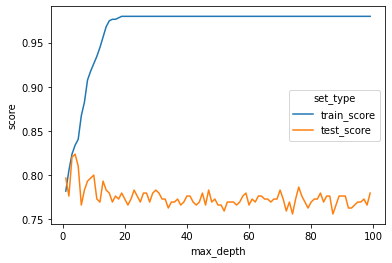

In [42]:
sns.lineplot(x="max_depth",y="score",hue="set_type",data=score_data_long)

недостаточна проверка только на тестовых данных
проверку модели нужно проводить на валидационных данных


In [43]:
from sklearn.model_selection import cross_val_score

In [44]:

clf= tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)

In [45]:
cross_val_score(clf, X_train,y_train,cv=5).mean()

0.765140056022409

In [46]:
cross_val_scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
   
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
   
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    cross_val_scores_data = cross_val_scores_data.append(temp_score_data)

In [47]:
cross_val_scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031


In [48]:
score_data_long = pd.melt(cross_val_scores_data,id_vars=['max_depth'],
                          value_vars=['train_score','test_score','cross_val_score'],
                          var_name='set_type', value_name='score')
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [49]:
score_data_long.query("set_type == 'cross_val_score'")
score_data_long.query('set_type == "cross_val_score"').sort_values('score', ascending=False).head(1)

,max_depth,set_type,score
203,6,cross_val_score,0.805434


<AxesSubplot:xlabel='max_depth', ylabel='score'>

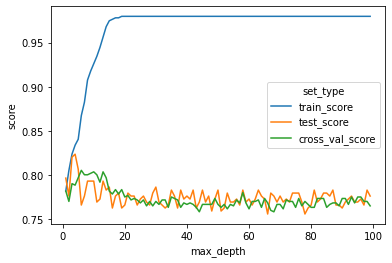

In [50]:
sns.lineplot(x="max_depth",y="score",hue="set_type",data=score_data_long)

In [51]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
best_clf.fit(X_train, y_train)
cross_val_score(best_clf, X_test, y_test , cv=5).mean()

0.8271186440677966

пример

In [88]:
train_iris = pd.read_csv('C:/Users/User/Desktop/ML stepik задачи/stepik_data_ml/train_iris.csv')

test_iris = pd.read_csv('C:/Users/User/Desktop/ML stepik задачи/stepik_data_ml/test_iris.csv')

In [119]:
max_depth_values
X_train = train_iris.drop(['Unnamed: 0','species'], axis = 1)
X_train.head()
y_train= train_iris.species
print(X_train.shape)
X_test = test_iris.drop(['Unnamed: 0','species'], axis = 1)
X_test.head()
y_test = test_iris.species
print(X_test.shape)


(100, 4)
(50, 4)


In [52]:
import numpy as np

In [114]:
rs = np.random.seed(0)

In [120]:
scores_data = pd.DataFrame()

In [121]:

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
   
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'accuracy_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [122]:
score_data_long = pd.melt(scores_data,id_vars=['max_depth'],
                          value_vars=['train_score','accuracy_score'],
                          var_name='set_type', value_name='score')
score_data_long.query("set_type == 'accuracy_score'").head()

,max_depth,set_type,score
99,1,accuracy_score,0.60
100,2,accuracy_score,0.94
101,3,accuracy_score,0.94
102,4,accuracy_score,0.92
103,5,accuracy_score,0.94


In [123]:
score_data_long.sort_values('score', ascending=False).head(1)

,max_depth,set_type,score
98,99,train_score,1.0


<AxesSubplot:xlabel='max_depth', ylabel='score'>

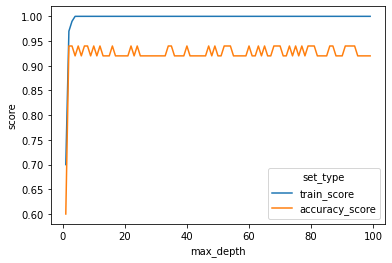

In [124]:
sns.lineplot(x="max_depth",y="score",hue="set_type",data=score_data_long)

задача 2.4.15

In [125]:
dogs_n_cats = pd.read_csv('C:/Users/User/Desktop/ML stepik задачи/stepik_data_ml/dogs_n_cats.csv')
dogs_n_cats.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [126]:
X_train = dogs_n_cats.drop(['Вид'], axis = 1)
X_train.head()
y_train= dogs_n_cats['Вид']
print(X_train.shape)

(1000, 5)


In [130]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print(train_score)

1.0


In [133]:
X_test = pd.read_json('C:/Users/User/Desktop/ML stepik задачи/stepik_data_ml/dataset_209691_15.txt')
X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,26,31.2,1,1,0
1,18,21.6,1,1,0
2,26,31.2,1,1,0
3,24,28.8,1,1,0
4,17,20.4,1,1,0


In [135]:
result = clf.predict(X_test)

In [140]:
(clf.predict(X_test)=='собачка').sum()

42

In [ ]:
X_test = test_iris.drop(['Unnamed: 0','species'], axis = 1)
X_test.head()
#y_test = test_iris.species
print(X_test.shape)

Метрики

In [33]:
# использует модель с набором параметров, 
# которые нужно проверить и с помощью кросс-валидации 
# позволяет подобрать максимально хороший результат
# можно выбрать по каким метрикам производить оценку
from sklearn.model_selection import GridSearchCV

In [61]:
# модель дерева для функции GridSearchCV
clf = tree.DecisionTreeClassifier()
print(clf)

DecisionTreeClassifier()


In [63]:
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print(train_score)

0.9798657718120806


In [64]:
# параметры которые будет подбирать функция GridSearchCV
parameters = {'criterion':['gini','entropy'], 'max_depth':range(1, 30)}

In [65]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv = 5)
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [66]:
y_train.head()

6      0
718    0
685    0
73     0
882    0
Name: Survived, dtype: int64

In [67]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [68]:
grid_search_cv_clf.best_params_


{'criterion': 'entropy', 'max_depth': 11}

In [69]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [70]:
best_clf.score(X_test, y_test)

0.7627118644067796

In [75]:
from sklearn.metrics import precision_score, recall_score

In [76]:
y_pred = best_clf.predict(X_test)

In [77]:
precision_score(y_test, y_pred)

0.7314814814814815

In [78]:
recall_score(y_test, y_pred)

0.6583333333333333

In [79]:
# предсказание вероятности 
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.42857143, 0.57142857],
       [0.5       , 0.5       ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

<AxesSubplot:>

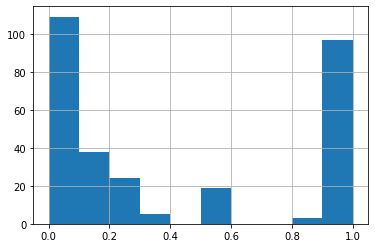

In [80]:
pd.Series(y_predicted_prob[:,1]).hist()

In [89]:
y_pred = np.where(y_predicted_prob[:,1] > 0.6, 1, 0)

In [91]:
precision_score(y_test, y_pred)

0.77

In [90]:
recall_score(y_test, y_pred)

0.6416666666666667

Как подобрать отсечку, где precision_score и recall_score имеют максимальное сочетание.
Для этого используем ROC кривую/
Чем хуже модель классифицирует данные, тем roc_curve ближе к диагонали.

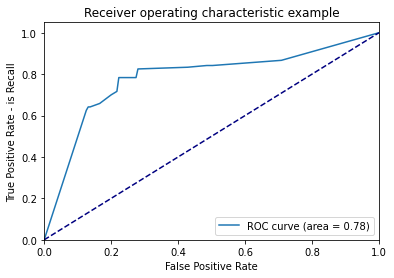

In [94]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate - is Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [95]:
y_pred = np.where(y_predicted_prob[:,1] > 0.78, 1, 0)
print('precision',precision_score(y_test, y_pred))
print('recall',recall_score(y_test, y_pred))

precision 0.77
recall 0.6416666666666667


In [25]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

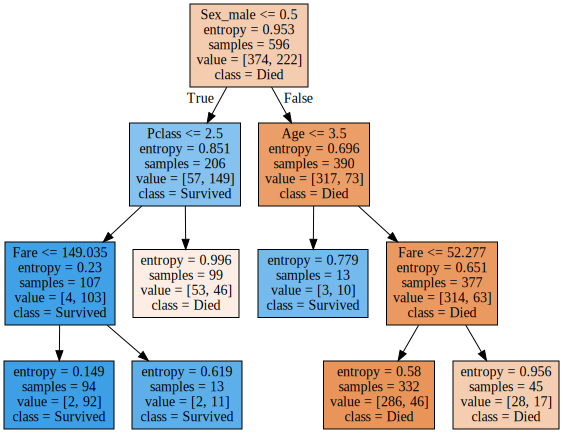

In [27]:
graph = Source(tree.export_graphviz(clf, out_file=None
                                    , feature_names=list(X), class_names=['Died','Survived']
                                   , filled=True))
display(SVG(graph.pipe(format='svg')))

RandomizedSearchCV работает быстрее GridSearchCV так как перебирает не все из возможных комбинаций параметров

GridSearchCV находит наилучшее значение параметров модели из возникающих в результате комбинации переданных параметров

Ни GridSearchCV, ни RandomizedSearchCV не гарантируют получение самой лучшей модели из возможных

### Random forest

In [ ]:
Чем больше деревьев, тем лучше 

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [68]:


clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [70]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test) 

В Data Science очень важен подбор параметров и предобработка данных. Для хорошего решения почти любой нетривиальной проблемы нужно понять примерную структуру данных, получить их представление в удобном для использования моделью виде. К первому относится эксплоративный анализ (EDA), а для второго есть feature engineering.

In [71]:
best_clf = grid_search_cv_clf.best_estimator_

In [72]:
best_clf.score(X_test, y_test)

0.7932203389830509

In [74]:
feature_importances = best_clf.feature_importances_

In [75]:
feature_importances_df = pd.DataFrame({'features':list(X_train),
                                      'feature_importances':feature_importances})

In [77]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.286450
5,Sex_female,0.232575
4,Fare,0.128232
0,Pclass,0.122882
1,Age,0.106985
2,SibSp,0.037166
7,Embarked_C,0.028130
3,Parch,0.027636
9,Embarked_S,0.022136
8,Embarked_Q,0.007808


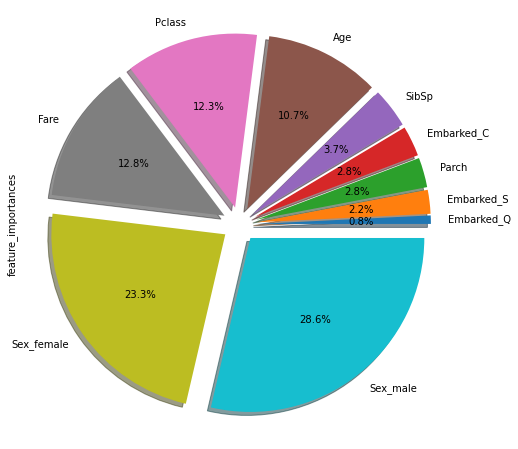

In [78]:
feature_importances_df = pd.DataFrame({'features':list(X_train.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

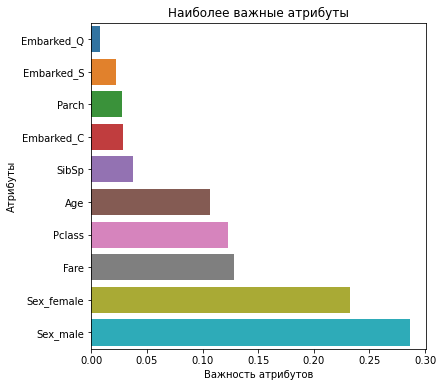

In [79]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances,a)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

При высокой скореллированности нескольких переменных сплит по любой из них может давать одинаковый Information Gain, и выбор будет сделан случайно. То есть, важность фичей может изменяться в зависимости от выбора из равноценных в процессе обучения. Поэтому следует смотреть на корреляцию между переменными перед обучением, чтобы лучше представлять данные.

In [80]:
heart_data = pd.read_csv("C:/Users/User/Desktop/ML stepik задачи/stepik_data_ml/heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [82]:
import numpy as np
np.random.seed(0)

In [85]:
X = heart_data.drop(columns=['target'])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [87]:
y = heart_data.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [96]:
rf = RandomForestClassifier(10, max_depth=5)

In [109]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [110]:
feature_importances = rf.feature_importances_

In [111]:
feature_importances_df = pd.DataFrame({'features':list(X.columns), 
                                       'feature_importances':  feature_importances})\
                        .sort_values('feature_importances',ascending=False)

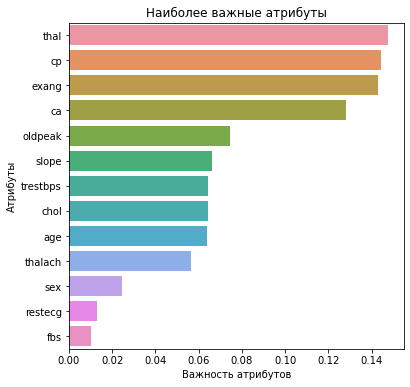

In [112]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

#### задаание про грибы

In [2]:
mush_data = pd.read_csv("C:/Users/User/Desktop/ML stepik задачи/stepik_data_ml/training_mush.csv")
mush_data

NameError: name 'pd' is not defined